In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import pylab
import seaborn as sns
from scipy.stats import linregress

In [2]:
# read HR-Employee-Attrition file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt", sep='\t')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df = df.drop(labels=['Over18','StandardHours','EmployeeCount'],axis=1)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [4]:
#we have to separate categorical and continuous variables by checking 
#the type of each column, also made a total list of all columns


def seperation(df):
    
    cat = []
    con = []
    df_col = []
    
    for i in df.columns:
        
        df_col.append(i),
        
        if df[i].dtype=='object':
            cat.append(i)
        else:
            con.append(i)
    return cat, con, df_col

In [5]:
#fill up the empty lists by setting both cat, con to function made
cat, con, df_col = seperation(df)

In [6]:
#histogram for each numerical column and counts in each range

def uni_histo(num):
    num = con[num]
    df.hist(num, grid = False)
    plt.xlabel(num)
    plt.ylabel('Count')
    plt.show()
    


In [7]:
def job_line_means(num):
    
    num = con[num]
    
    job_means = df.groupby("Attrition").mean()
    job_means = job_means.reset_index()
    job_means
    
    return job_means

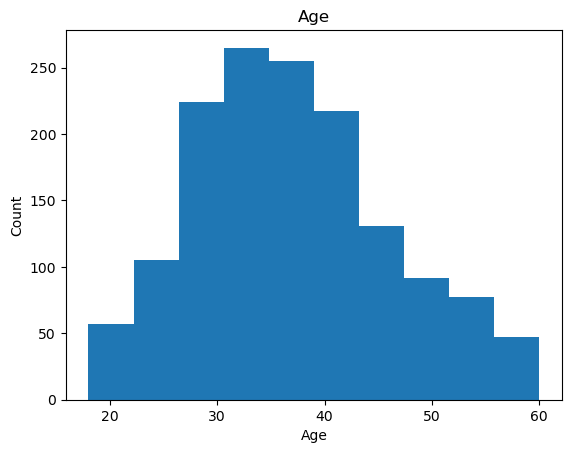

In [8]:
uni_histo(0)

In [9]:
#finds averages of all columns grouped by attrition and jobrole and puts them in df

def job_line_means(num):
    
    num = con[num]
    
    job_means = df.groupby(["Attrition", 'JobRole']).mean()
    job_means = job_means.reset_index()
    job_means
    
    return job_means

In [10]:

#for graphs about about job_line_means function 

def job_linegraph(num):
    
    num = con[num]
    
    job_means = df.groupby(["Attrition", 'JobRole']).mean()
    job_means = job_means.reset_index()
    job_means

     
    #get to plotting
    job_list = job_means["JobRole"]
    job_list = job_list.drop_duplicates()
    job_list = job_list.tolist()
    
    job_no = job_means[job_means['Attrition'].str.contains('No')]
    job_no = job_no[num]
    job_no = job_no.tolist()
    
    
    
    job_yes = job_means[job_means['Attrition'].str.contains('Yes')]
    job_yes = job_yes[num]
    job_yes = job_yes.tolist()
    
    plt.plot(job_list, job_no, label = "kept job")
    plt.plot(job_list, job_yes, label = 'left job')
    
    plt.title("Rates based on Attrition by Job Role")
    plt.xlabel("Jobs")
    plt.ylabel(num)
    plt.xticks(rotation = 'vertical')
    
    plt.legend()   
    plt.show()

In [11]:
#finds averages of all columns grouped by attrition and jobrole and puts them in df

def education_line_means(num):
    
    num = con[num]
    
    edu_means = df.groupby(["Attrition", 'Education']).mean()
    edu_means = edu_means.reset_index()
    edu_means
    
    return job_means

In [12]:
job_line_means(1)

,Attrition,JobRole,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,Healthcare Representative,39.877049,869.811475,9.204918,3.040984,1081.836066,2.819672,66.278689,2.737705,...,3.155738,2.713115,0.844262,13.901639,2.786885,2.704918,8.188525,4.852459,2.885246,4.590164
1,No,Human Resources,37.125000,760.325000,6.600000,2.850000,1222.950000,2.675000,64.550000,2.775000,...,3.150000,2.925000,0.725000,8.800000,2.700000,2.925000,5.675000,3.475000,1.400000,3.675000
2,No,Laboratory Technician,34.944162,794.720812,9.329949,2.786802,1016.482234,2.822335,67.091371,2.746193,...,3.147208,2.695431,0.913706,8.142132,3.040609,2.817259,5.604061,3.538071,1.548223,3.725888
3,No,Manager,46.783505,778.123711,7.927835,3.051546,954.587629,2.814433,66.432990,2.804124,...,3.206186,2.783505,0.752577,24.701031,2.845361,2.762887,14.371134,6.381443,4.835052,6.185567
4,No,Manufacturing Director,38.222222,802.518519,9.533333,2.851852,992.222222,2.940741,64.888889,2.688889,...,3.200000,2.762963,0.814815,12.629630,2.755556,2.770370,7.518519,5.081481,2.148148,4.940741
5,No,Research Director,43.858974,801.923077,8.474359,3.115385,1003.846154,2.487179,64.371795,2.769231,...,3.102564,2.653846,0.871795,21.141026,2.820513,2.858974,10.538462,6.064103,2.910256,6.025641
6,No,Research Scientist,34.567347,817.555102,8.869388,2.918367,1010.444898,2.746939,66.457143,2.853061,...,3.151020,2.791837,0.836735,8.020408,2.665306,2.669388,5.265306,3.481633,1.440816,3.277551
7,No,Sales Executive,36.758364,813.910781,9.026022,3.000000,1040.832714,2.732342,65.955390,2.754647,...,3.130112,2.724907,0.881041,11.104089,2.869888,2.858736,7.665428,4.996283,2.360595,4.847584
8,No,Sales Representative,32.060000,862.340000,9.000000,2.580000,1071.260000,2.760000,63.700000,2.780000,...,3.160000,2.500000,0.740000,5.460000,3.060000,2.780000,3.460000,2.520000,1.360000,2.000000
9,Yes,Healthcare Representative,38.888889,643.333333,17.666667,2.333333,979.222222,2.111111,74.444444,2.666667,...,3.111111,2.444444,0.666667,16.333333,2.222222,2.666667,10.888889,5.000000,4.111111,4.333333


In [13]:
def education_linegraph(num):
    
    num = con[num]
    
    edu_means = df.groupby(["Attrition", 'Education']).mean()
    edu_means = edu_means.reset_index()
    edu_means

     
    #get to plotting
    edu_list = edu_means["Education"]
    edu_list = edu_list.drop_duplicates()
    edu_list = edu_list.tolist()
    
    edu_no = edu_means[edu_means['Attrition'].str.contains('No')]
    edu_no = edu_no[num]
    edu_no = edu_no.tolist()
    
    
    
    edu_yes = edu_means[edu_means['Attrition'].str.contains('Yes')]
    edu_yes = edu_yes[num]
    edu_yes = edu_yes.tolist()
    
    plt.plot(edu_list, edu_no, label = "kept job")
    plt.plot(edu_list, edu_yes, label = 'left job')
    
    plt.title("Rates based on Attrition by Job Role")
    plt.xlabel("Education")
    plt.ylabel(num)
    plt.xticks(rotation = 'vertical')
    
    plt.legend()   
    plt.show()

In [14]:
def categorical_dataframes(num , y):
    
    num = con[num]
    y = df_col[y]
    
    cat_means = df.groupby(["Attrition", y]).mean()
    cat_means = cat_means.reset_index()
    cat_means
    
    print("category: " + num)
    print("df column: " + y)
    
    return cat_means

In [15]:
categorical_dataframes(3,3)

category: Education
df column: DailyRate


,Attrition,DailyRate,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,102,53.0,23.0,4.000000,901.0,4.000000,72.0,3.000000,4.0,...,3.0,3.000000,0.0,33.0,0.000000,3.0,12.000000,9.0,3.000000,8.000000
1,No,105,39.0,9.0,3.000000,2022.0,4.000000,87.0,3.000000,5.0,...,3.0,3.000000,0.0,21.0,3.000000,2.0,6.000000,0.0,1.000000,3.000000
2,No,106,31.0,2.0,3.000000,424.0,1.000000,62.0,2.000000,2.0,...,3.0,4.000000,0.0,9.0,1.000000,3.0,2.000000,2.0,1.000000,0.000000
3,No,107,40.0,10.0,3.000000,1239.0,2.000000,84.0,2.000000,2.0,...,3.0,2.000000,1.0,7.0,2.000000,4.0,5.000000,1.0,1.000000,3.000000
4,No,111,43.0,9.0,2.666667,517.0,2.666667,70.0,2.333333,2.0,...,3.0,3.666667,1.0,14.0,3.666667,3.0,4.333333,3.0,2.333333,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Yes,1474,32.0,11.0,4.000000,631.0,4.000000,60.0,4.000000,2.0,...,3.0,4.000000,0.0,6.0,2.000000,3.0,4.000000,2.0,1.000000,2.000000
1017,Yes,1475,38.5,20.5,2.000000,1676.5,2.500000,90.5,2.500000,2.0,...,3.5,2.500000,0.0,13.0,1.000000,3.0,3.000000,1.5,1.500000,2.500000
1018,Yes,1479,40.0,24.0,3.000000,986.0,2.000000,100.0,4.000000,4.0,...,3.0,4.000000,0.0,22.0,2.000000,2.0,1.000000,0.0,0.000000,0.000000
1019,Yes,1485,28.0,12.0,1.000000,1175.0,3.000000,79.0,3.000000,1.0,...,3.0,4.000000,0.0,1.0,4.000000,2.0,1.000000,1.0,0.000000,0.000000


In [37]:
# matches any numerical value with any column in dataframe and makes a line graph 

def categorical_linegraph(num , y):
    
    try:
        num = con[num]
        y = df_col[y]
    
        edu_means = df.groupby(["Attrition", y]).mean()
        edu_means = edu_means.reset_index()
        edu_means

     
    
        edu_list = edu_means[y]
        edu_list = edu_list.drop_duplicates()
        edu_list = edu_list.tolist()
    
        edu_no = edu_means[edu_means['Attrition'].str.contains('No')]
        edu_no = edu_no[num]
        edu_no = edu_no.tolist()
    
    
    
        edu_yes = edu_means[edu_means['Attrition'].str.contains('Yes')]
        edu_yes = edu_yes[num]
        edu_yes = edu_yes.tolist()
    
        plt.plot(edu_list, edu_no, label = "kept job")
        plt.plot(edu_list, edu_yes, label = 'left job')
    
        plt.title("Rates based on Attrition by " + y)
        plt.xlabel(y)
        plt.ylabel(num)
        plt.xticks(rotation = 'vertical')
        
        plt.legend()   
        plt.show()
        
    except:
        print("An exception occured with mismatching x and y values")
    

In [17]:
edu_means = df.groupby("Attrition").mean()
edu_means = edu_means.reset_index()
edu_means

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,37.561233,812.504461,8.915653,2.927007,1027.656123,2.771290,65.952149,2.770479,2.145985,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,Yes,33.607595,750.362869,10.632911,2.839662,1010.345992,2.464135,65.573840,2.518987,1.637131,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


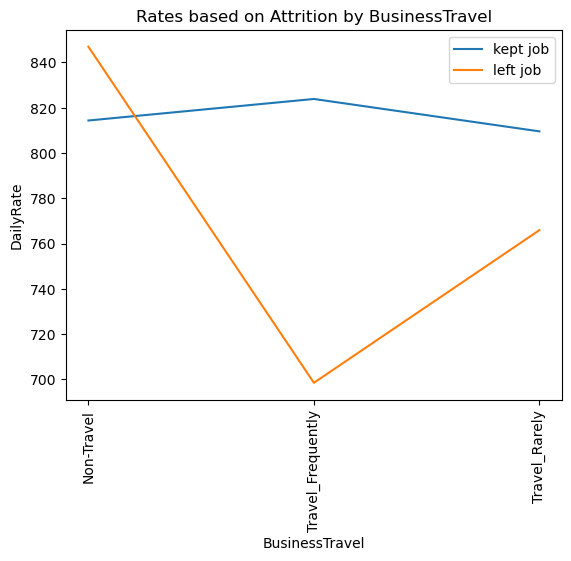

In [38]:
categorical_linegraph(1,2)

In [21]:
def attrition_count(num):
    
    num = cat[num]
    
    Count =  df.groupby([num,"Attrition"]).Age.count()
    Count = pd.DataFrame({"Count": Count})
    Count = Count.reset_index()
    
    return Count

In [22]:
attrition_count(1)

,BusinessTravel,Attrition,Count
0,Non-Travel,No,138
1,Non-Travel,Yes,12
2,Travel_Frequently,No,208
3,Travel_Frequently,Yes,69
4,Travel_Rarely,No,887
5,Travel_Rarely,Yes,156


In [23]:
#makes a stacked bar graph showing how many people kept and left the job 

def attrition_count_bargraph(num):
    
    num = cat[num]
    
    Count =  df.groupby([num, "Attrition"]).Age.count()
    Count = pd.DataFrame({"Count": Count})
    Count = Count.reset_index()
    
    
    att_list = Count[num]
    att_list = att_list.drop_duplicates()
    att_list = att_list.tolist()
    



    att_no = Count[Count["Attrition"].str.contains('No')]
    att_no = att_no['Count']
    att_no = att_no.tolist()
    



    att_yes = Count[Count["Attrition"].str.contains('Yes')]
    att_yes = att_yes['Count']
    att_yes = att_yes.tolist()
    
    
    
    plt.bar(att_list, att_no, color='green')
    plt.bar(att_list, att_yes, bottom= att_no, color='red',)
    plt.xticks(rotation = 'vertical')

    labels = ["Kept job", "Left job"]
    plt.legend(labels)

    plt.show()


In [24]:
#shows how many people are males and how many are females 
def gender_pie():
    gender_df= df.groupby('Gender').Attrition.count()
    gender_df = gender_df.reset_index()
    gender_df
    
    labels = gender_df['Gender']

    colors = ["red", "lime"]

    gender_pie = gender_df.plot(kind = 'pie', 
           y = "Attrition",
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)

In [25]:
def attrition_pie():
    
    all_att = df.groupby('Attrition').Gender.count()
    all_att = pd.DataFrame({"count": all_att})
    all_att = all_att.reset_index()

    labels = ["Kept job", "Left job"]
    colors = ["lime", "red"]

    all_att.plot(kind = 'pie',y = "count", 
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)
    

In [26]:


def pie_by_male():
    
    gender1 = df.groupby(['Gender', 'Attrition']).Attrition.count()
    gender_att = pd.DataFrame({"Count": gender1})
    gender_att.reset_index() 

    Male_attrition = gender_att.iloc[2:]
    Male_attrition = Male_attrition.reset_index()

    
    
    
    fig, ax = plt.subplots()
    patches, texts, pcts = ax.pie(Male_attrition['Count'], labels= ['kept job', 'left job'], autopct='%.1f%%',
          wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
    
    plt.setp(pcts, color='white', fontweight='bold')
    
    
    ax.set_title('Males by Attrition')
    plt.tight_layout()
    
    
    
    

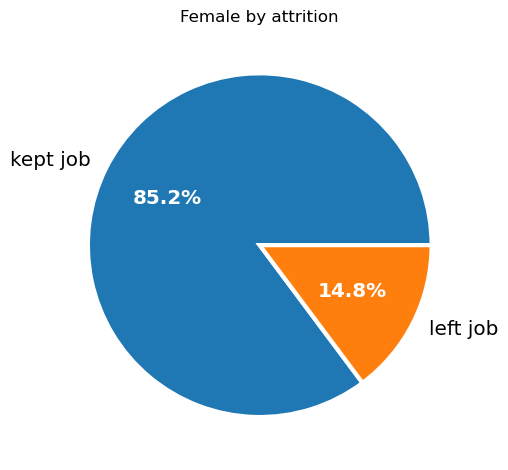

In [39]:
def pie_by_female():
    
    gender1 = df.groupby(['Gender', 'Attrition']).Attrition.count()
    gender_att = pd.DataFrame({"Count": gender1})
    gender_att.reset_index()
    
    Female_attrition = gender_att.iloc[:2]
    Female_attrition = Female_attrition.reset_index()
    
    
    
    fig, ax = plt.subplots()
    patches, texts, pcts = ax.pie(Female_attrition['Count'], 
                                  labels=['kept job', 'left job'],
                                  autopct='%.1f%%',
                                  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
    ax.set_title('Female by attrition')
    
    plt.setp(pcts, color='white', fontweight='bold')
    plt.tight_layout()
    
pie_by_female()

In [28]:
#scatterplots 

categorical_dataframes(3,3)

category: Education
df column: DailyRate


,Attrition,DailyRate,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,102,53.0,23.0,4.000000,901.0,4.000000,72.0,3.000000,4.0,...,3.0,3.000000,0.0,33.0,0.000000,3.0,12.000000,9.0,3.000000,8.000000
1,No,105,39.0,9.0,3.000000,2022.0,4.000000,87.0,3.000000,5.0,...,3.0,3.000000,0.0,21.0,3.000000,2.0,6.000000,0.0,1.000000,3.000000
2,No,106,31.0,2.0,3.000000,424.0,1.000000,62.0,2.000000,2.0,...,3.0,4.000000,0.0,9.0,1.000000,3.0,2.000000,2.0,1.000000,0.000000
3,No,107,40.0,10.0,3.000000,1239.0,2.000000,84.0,2.000000,2.0,...,3.0,2.000000,1.0,7.0,2.000000,4.0,5.000000,1.0,1.000000,3.000000
4,No,111,43.0,9.0,2.666667,517.0,2.666667,70.0,2.333333,2.0,...,3.0,3.666667,1.0,14.0,3.666667,3.0,4.333333,3.0,2.333333,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Yes,1474,32.0,11.0,4.000000,631.0,4.000000,60.0,4.000000,2.0,...,3.0,4.000000,0.0,6.0,2.000000,3.0,4.000000,2.0,1.000000,2.000000
1017,Yes,1475,38.5,20.5,2.000000,1676.5,2.500000,90.5,2.500000,2.0,...,3.5,2.500000,0.0,13.0,1.000000,3.0,3.000000,1.5,1.500000,2.500000
1018,Yes,1479,40.0,24.0,3.000000,986.0,2.000000,100.0,4.000000,4.0,...,3.0,4.000000,0.0,22.0,2.000000,2.0,1.000000,0.0,0.000000,0.000000
1019,Yes,1485,28.0,12.0,1.000000,1175.0,3.000000,79.0,3.000000,1.0,...,3.0,4.000000,0.0,1.0,4.000000,2.0,1.000000,1.0,0.000000,0.000000


In [29]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [30]:
#groupby columns and find means of all numerical columns 

def scatter_func(i,j):
   
    
    try:
        
        df_means = df.groupby([cat[i], cat[j]]).mean()
        df_means = df_means.reset_index()
        
    except:
        print("Can't have the same i and j value")
        
    
    return df_means



In [31]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [32]:
scatter_func(1,3)

,BusinessTravel,EducationField,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Non-Travel,Human Resources,48.000000,862.500000,8.500000,3.250000,953.750000,2.750000,55.500000,2.500000,...,3.250000,3.250000,1.250000,19.000000,3.250000,3.000000,5.500000,4.250000,2.500000,4.000000
1,Non-Travel,Life Sciences,37.714286,795.333333,8.682540,2.888889,1134.111111,2.746032,66.380952,2.571429,...,3.174603,2.888889,0.873016,10.539683,2.555556,2.777778,7.650794,4.619048,2.126984,4.238095
2,Non-Travel,Marketing,35.083333,883.916667,14.000000,3.000000,946.000000,2.833333,74.250000,2.750000,...,3.166667,2.333333,0.666667,9.166667,2.583333,2.500000,7.583333,4.833333,2.666667,5.083333
3,Non-Travel,Medical,35.860000,768.160000,9.000000,2.880000,974.660000,2.680000,58.260000,2.640000,...,3.180000,2.860000,0.840000,11.100000,3.080000,2.840000,7.040000,3.840000,3.160000,4.220000
4,Non-Travel,Other,32.714286,895.428571,15.571429,3.285714,787.000000,2.428571,73.000000,2.714286,...,3.000000,2.857143,0.571429,9.428571,2.714286,2.857143,5.428571,4.000000,1.428571,4.428571
5,Non-Travel,Technical Degree,34.428571,978.928571,11.142857,2.928571,1345.428571,2.928571,72.214286,2.785714,...,3.214286,2.214286,1.142857,8.428571,2.142857,2.642857,6.214286,4.785714,1.000000,4.214286
6,Travel_Frequently,Human Resources,34.833333,938.000000,11.000000,3.166667,1562.666667,2.000000,61.500000,2.500000,...,3.166667,2.833333,0.666667,8.666667,1.833333,2.666667,5.666667,2.500000,0.333333,2.666667
7,Travel_Frequently,Life Sciences,36.170732,787.325203,8.845528,2.853659,962.634146,2.739837,66.235772,2.715447,...,3.186992,2.772358,0.821138,11.170732,2.804878,2.682927,7.341463,4.398374,2.487805,4.398374
8,Travel_Frequently,Marketing,36.370370,725.481481,9.370370,3.222222,880.185185,2.592593,64.555556,2.814815,...,3.037037,3.074074,0.555556,9.888889,3.222222,2.851852,6.629630,4.000000,2.259259,4.259259
9,Travel_Frequently,Medical,38.360465,805.930233,10.197674,2.860465,1036.720930,2.593023,62.441860,2.755814,...,3.162791,2.744186,0.802326,12.872093,2.767442,2.790698,7.872093,4.395349,2.395349,4.348837


In [33]:


def scatter_plot(i,j, k = "EducationLevel" , l = "MonthlyIncome" ):
    
    try:
        df_means = scatter_func(i,j)
        correlation = st.pearsonr(df_means[k], df_means[l])
        correlation = round(correlation[0],2)
        print(f"The correlation is {correlation}")
        x_values = df_means[k]
        y_values = df_means[l]
    
    
        plt.scatter(x_values, y_values , color = "steelblue")
        plt.xlabel(k)
        plt.ylabel(l)

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        plt.plot(x_values,regress_values,"r-")
        
    except:  
        return df_col[i], df_col[j], 
        plt.show()
    
        print("Remeber you cannot have a i,j value greater than 7")

In [34]:
scatter_func(7,6 )

,OverTime,MaritalStatus,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,Divorced,36.767544,838.096491,9.166667,2.894737,1006.907895,2.644737,66.684211,2.771930,...,3.153509,2.692982,1.543860,11.644737,2.859649,2.763158,7.013158,4.372807,2.105263,4.311404
1,No,Married,37.683778,816.774127,9.119097,2.932238,1070.347023,2.648871,67.186858,2.745380,...,3.160164,2.618070,0.995893,11.659138,2.811088,2.778234,7.527721,4.523614,2.431211,4.359343
2,No,Single,35.436578,750.811209,8.911504,2.938053,999.861357,2.728614,63.805310,2.684366,...,3.141593,2.758112,0.000000,10.294985,2.941003,2.772861,6.398230,3.920354,1.970501,3.946903
3,Yes,Divorced,39.151515,812.838384,8.979798,2.939394,972.757576,3.010101,63.292929,2.707071,...,3.131313,2.797980,1.414141,12.181818,2.727273,2.717172,7.969697,4.313131,2.272727,4.000000
4,Yes,Married,37.951613,828.661290,10.349462,2.854839,1033.586022,2.817204,65.413978,2.768817,...,3.150538,2.774194,1.021505,11.924731,2.618280,2.698925,6.731183,4.392473,2.236559,3.967742
5,Yes,Single,35.076336,776.122137,8.755725,2.870229,978.740458,2.755725,67.732824,2.679389,...,3.183206,2.824427,0.000000,10.183206,2.595420,2.786260,6.312977,3.389313,1.854962,3.687023


The correlation is 0.3


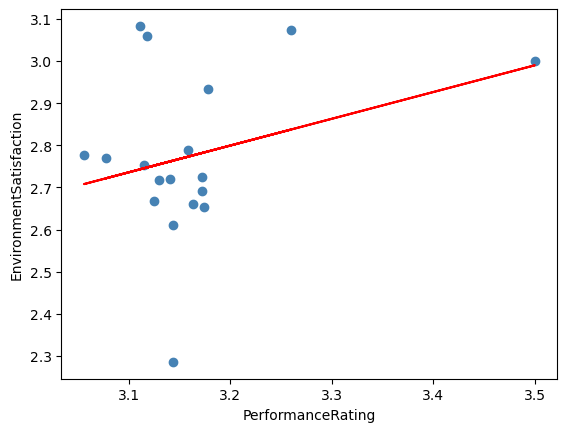

In [35]:
scatter_plot(3,6, "PerformanceRating","EnvironmentSatisfaction")

